In [17]:
import sys, os

import numpy as np
from scipy.special import sph_harm
import healpy as hp
from tqdm import *
from mpmath import spherharm
from vsh import *
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
nside = 2
lmax = 3*nside - 1
npix = hp.nside2npix(nside)
coords = np.transpose(hp.pix2ang(nside, range(npix)))

In [19]:
def Y_map(l,m):
    npix = hp.nside2npix(nside)
    coords = np.transpose(hp.pix2ang(nside, range(npix)))
    return [Ylm(l,m, *coord) for coord in coords]

def Psi_map(l,m):
    npix = hp.nside2npix(nside)
    coords = np.transpose(hp.pix2ang(nside, range(npix)))
    return [Psilm_vec(l,m, 1, *coord) for coord in coords]

In [20]:
from healpy.sphtfunc import Alm

def fn_alm_getidx(lmax,l,m):
    if m >= 0:
        return Alm.getidx(lmax,l,m)
    else:
        return round(0.5*lmax**2 + 1.5*lmax + 1) - (lmax+1) + Alm.getidx(lmax,l,abs(m))
    
def fn_alm_getlm(lmax,idx):
    if idx < round(0.5*lmax**2 + 1.5*lmax + 1):
        return Alm.getlm(lmax,idx)
    else:
        lm_pos =  Alm.getlm(lmax, idx - round(0.5*lmax**2 + 1.5*lmax + 1) + (lmax+1))
        return (lm_pos[0], -lm_pos[1])

In [21]:
def fn_mat_Fisher1_fromPsi(): #unit weights map for now
    amp = np.zeros(((lmax+1)**2,(lmax+1)**2),dtype='complex')
    for idx in tqdm_notebook(range((lmax+1)**2)):
        l, m = fn_alm_getlm(lmax,idx)[0].item(), fn_alm_getlm(lmax,idx)[1].item()
        for idx_p in range((lmax+1)**2):
            l_p, m_p = fn_alm_getlm(lmax,idx_p)[0].item(), fn_alm_getlm(lmax,idx_p)[1].item()
            amp[idx,idx_p]=(4*np.pi/npix)*sum(sum(Psi_map(l,m) * np.conj(Psi_map(l_p,m_p))))
    return (1/2) * amp * np.transpose(amp)

In [34]:
mat_fisher1_slow = fn_mat_Fisher1_fromPsi()

/home/sm8383/Lensing-PowerSpectra/Estimator/vsh.py:79: RuntimeWarning: invalid value encountered in true_divide
  """ theta polar, phi azimuthal


/home/sm8383/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


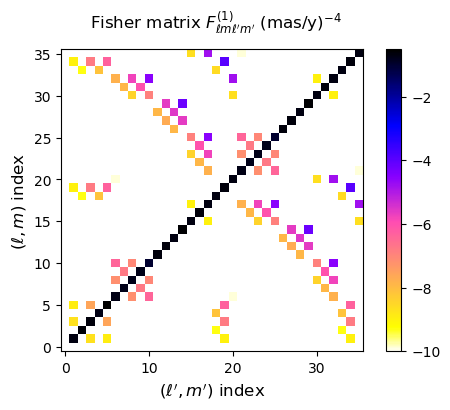

In [37]:
plt.figure(num=None, figsize=(6,4), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(np.log(abs(mat_fisher1_slow)), origin='lower', vmin=-10, cmap = 'gnuplot2_r');
plt.suptitle('Fisher matrix $F^{(1)}_{\ell m \ell^{\prime} m^\prime}$ $(\mathrm{mas/y})^{-4}$', fontsize=12)
plt.xlabel('$(\ell^\prime,m^\prime)$ index', fontsize=12)
plt.ylabel('$(\ell,m)$ index', fontsize=12)
plt.colorbar()
plt.show()

In [41]:
l = 2
m = 2
print(Psi_map(l,m)[0])
print(Psi_map(l,-m)[0])

[ 7.07497715e-18+1.15543145e-01j -1.26047068e-01+7.71815689e-18j]
[ 7.07497715e-18-1.15543145e-01j -1.26047068e-01-7.71815689e-18j]
